<a href="https://www.kaggle.com/code/vijays140291/notebook3a0eb3e280?scriptVersionId=122311624" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Principal Component Analysis
Principal Component Analysis(PCA) is a statistical technique used to reduce the dimensionality of a data. It is powerful tool for idenfitying pattersn and relationship in high-dimensional data by transforming the data into new coordinate system where the axes are the principal components.
The principal components are linear combinations of the original variables that capture the most significant variation in the data. The first principal component captures the largest amount of variation in the data, the second component captures the largest amount of remaining variation, and so on. By retaining only the top few principal components PCA can reduce the number of variables in a data set while retaining most of the original variation.
PCA can be used for various purposes, such as data compression, data visualization, and noise reduction. It is widely used in field such as finance, biology, social sciences, and computer science.
The PCA alogithem involes several steps, including standardizing the data, computing the covariance matrix, computer the eigenvalues and eigenvectors based on their eignevalues. The resulted principal components can be used to transform the original data into a lower-dimensional space.
PCa has some limitations such as its sensitivity to outliers and the fact that the resulting principal components may not be easily interpretable in terms of the original variables. Nonetheless, it is a powerful and widely used technique for analyzing hig-dimensional data.


# Bankruptcy Prediction

In [96]:
#importing the library
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns',None)

from sklearn.svm import LinearSVC,SVC

#train_test_split
from sklearn.model_selection import train_test_split
#StandardScaler
from sklearn.preprocessing import StandardScaler
#LogisticRegression
from sklearn.linear_model import LogisticRegression
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#MLPClassifier
from sklearn.neural_network import MLPClassifier
#ensemble
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
#Principal Component Analysis
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore')

# Importing the Library

In [97]:
df=pd.read_csv('/kaggle/input/company-bankruptcy-prediction/data.csv')
#showing the dataset
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

# Checking for Preliminary Information About the Dataset

In [98]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

# Bankruptcy Class Distribution

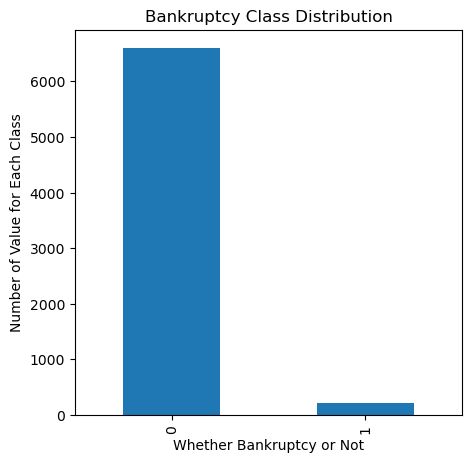

In [99]:
plt.figure(figsize=(5,5))
df['Bankrupt?'].value_counts().plot(kind='bar')
plt.title('Bankruptcy Class Distribution')
plt.xlabel('Whether Bankruptcy or Not')
plt.ylabel('Number of Value for Each Class')
plt.show()

# Getting Information about the dataset

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

# Checking for Number of Unique Value in Each Columns

In [101]:
{column:len(df[column].unique()) for column in df.columns}

{'Bankrupt?': 2,
 ' ROA(C) before interest and depreciation before interest': 3333,
 ' ROA(A) before interest and % after tax': 3151,
 ' ROA(B) before interest and depreciation after tax': 3160,
 ' Operating Gross Margin': 3781,
 ' Realized Sales Gross Margin': 3788,
 ' Operating Profit Rate': 3376,
 ' Pre-tax net Interest Rate': 3789,
 ' After-tax net Interest Rate': 3604,
 ' Non-industry income and expenditure/revenue': 2551,
 ' Continuous interest rate (after tax)': 3617,
 ' Operating Expense Rate': 2966,
 ' Research and development expense rate': 1536,
 ' Cash flow rate': 5557,
 ' Interest-bearing debt interest rate': 1080,
 ' Tax rate (A)': 2488,
 ' Net Value Per Share (B)': 2278,
 ' Net Value Per Share (A)': 2285,
 ' Net Value Per Share (C)': 2284,
 ' Persistent EPS in the Last Four Seasons': 1358,
 ' Cash Flow Per Share': 1545,
 ' Revenue Per Share (Yuan ¥)': 3807,
 ' Operating Profit Per Share (Yuan ¥)': 1236,
 ' Per Share Net profit before tax (Yuan ¥)': 1522,
 ' Realized Sale

# Preprocessing the Dataset

In [102]:
def preprocess_inputs(df):
    df=df.copy()
    #dropping the ' Net Income Flag' column as it is not provided any information
    df=df.drop(' Net Income Flag',axis=1)
    y=df['Bankrupt?']
    x=df.drop('Bankrupt?',axis=1)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
    #StandardScaler
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    
    
    
    
    
    
    return x_train,x_test,y_train,y_test

In [103]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4773, 94)
(2046, 94)
(4773,)
(2046,)


# Training the Model without dimensionality reduction

In [104]:
original_models={
    'Logistic Regression':LogisticRegression(),
    'K-Nearest Neighbors':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Support Vector Machine(Linear Kernel)': LinearSVC(),
    'Support Vector Machine(Non Linear Kernel)':SVC(),
    'Neural Network':MLPClassifier(),
     'Random Forest':RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier()
}

In [105]:
original_results=[]
for name,model in original_models.items():
    model.fit(x_train,y_train)
    score=model.score(x_test,y_test)
    original_results.append(score)
    print(name+":"+str(score))

Logistic Regression:0.9643206256109482
K-Nearest Neighbors:0.9648093841642229
Decision Tree:0.9525904203323559
Support Vector Machine(Linear Kernel):0.9623655913978495
Support Vector Machine(Non Linear Kernel):0.9657869012707723
Neural Network:0.9589442815249267
Random Forest:0.9657869012707723
Gradient Boosting:0.9608993157380255


In [106]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [107]:
np.mean(original_results)

0.9619379276637341

In [108]:
x_train.shape

(4773, 94)

# Principal Component Analysis

In [109]:
n_components=10
pca=PCA(n_components=n_components)
x_train_reduced=pd.DataFrame(pca.fit_transform(x_train),columns=['PCA'+str(i) for i in range(1,n_components+1)])
x_test_reduced=pd.DataFrame(pca.fit_transform(x_test),columns=['PCA'+str(i) for i in range(1,n_components+1)])

In [110]:
x_train_reduced

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,21.396976,-7.427651,-10.397280,16.370695,8.425692,14.789684,-1.003255,0.697726,2.607269,-2.647784
1,-0.537224,-0.632261,1.522342,0.061110,-0.894804,0.107834,0.152013,-0.486497,-0.608004,-0.342253
2,-3.777723,-0.482680,1.124980,0.333701,1.280757,0.362960,0.889015,-0.526545,-1.483620,-0.980260
3,3.117702,-0.670054,1.195473,-0.645730,-1.854263,0.649585,0.875195,-0.858426,-0.301759,-0.942929
4,0.849587,0.692991,-1.478038,-0.475943,-0.765475,0.085721,-0.806173,0.789258,0.944818,0.573476
...,...,...,...,...,...,...,...,...,...,...
4768,0.566131,-0.528658,0.121103,-0.413549,0.398820,1.001965,-0.128380,-0.686434,-0.967209,-0.260753
4769,-2.253139,3.499418,-4.649489,-0.691629,-0.649479,1.182151,-0.247868,0.435172,0.684714,0.662886
4770,-5.630053,0.345904,-0.508832,1.035868,2.010788,0.571760,-1.437361,-2.490428,0.373432,0.459887
4771,7.567251,-0.172203,0.265167,-0.821673,-0.222952,-0.915387,2.149971,0.120533,-0.186551,0.254541


In [111]:
pca.explained_variance_ratio_

array([9.99911887e-01, 8.81125903e-05, 9.80299538e-20, 2.51634039e-20,
       7.15101320e-21, 3.85044137e-21, 1.72013564e-21, 1.07393221e-21,
       7.43422590e-22, 6.85145909e-22])

In [112]:
fig=px.bar(
    x=['PCA'+str(i) for i in range(1,n_components+1)],
          y=pca.explained_variance_ratio_,
          labels={'x':'Principal Component','y':'Variance Ratio'},
          color=pca.explained_variance_ratio_,
          color_continuous_scale=[(0,'lightblue'),(1,'darkblue')],
          title='Proportion of Variance in Principal Components')
fig.show()

# Training on Reduced Dataset

In [113]:
reduced_models={
    'Logistic Regression':LogisticRegression(),
    'K-Nearest Neighbors':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Support Vector Machine(Linear Kernel)': LinearSVC(),
    'Support Vector Machine(Non Linear Kernel)':SVC(),
    'Neural Network':MLPClassifier(),
     'Random Forest':RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier()
}

In [114]:
for name,model in reduced_models.items():
    model.fit(x_train_reduced,y_train)
    print(name+'trained')
    

Logistic Regressiontrained
K-Nearest Neighborstrained
Decision Treetrained
Support Vector Machine(Linear Kernel)trained
Support Vector Machine(Non Linear Kernel)trained
Neural Networktrained
Random Foresttrained
Gradient Boostingtrained


In [115]:
reduced_results=[]
for name,model in reduced_models.items():
    model.fit(x_train_reduced,y_train)
    score=model.score(x_test_reduced,y_test)
    reduced_results.append(score)
    print(name+":"+str(score))

Logistic Regression:0.9652981427174976
K-Nearest Neighbors:0.9652981427174976
Decision Tree:0.738514173998045
Support Vector Machine(Linear Kernel):0.9657869012707723
Support Vector Machine(Non Linear Kernel):0.9652981427174976
Neural Network:0.9652981427174976
Random Forest:0.9657869012707723
Gradient Boosting:0.03519061583577713


In [116]:
np.mean(reduced_results)

0.8208088954056696

# Change in Performance after PCA

In [121]:
fig=px.bar(x=np.subtract(reduced_results,original_results),
          y=original_models.keys(),
          orientation='h',
          labels={'x':'Change in Performance ','y':'Model'},
          color=np.subtract(reduced_results,original_results),
          color_continuous_scale=[(0,'red'),(1,'blue')],
          title='Change in Model Performance after dimensionality reduction')
fig.show()

# Score after Dimensionality Reduction

In [117]:
x_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,-7.065972,-7.189713,-7.577832,-0.353178,-0.352216,-27.422519,-9.852867,-9.473508,0.174600,-17.488805,-0.623336,-0.750627,-3.409234,-0.146024,-0.831378,-1.684936,-1.679626,-1.680602,-2.210939,-1.269358,-0.023643,-2.383154,-1.803000,-0.072283,-0.149416,-0.092698,-0.093621,-0.017514,-1.071132,-0.123720,-0.358472,-6.762465,-0.014476,-0.029836,-0.031652,-0.025154,-0.245936,0.245936,-0.118704,-0.292121,-0.045435,-2.398334,-1.930971,-0.554824,-1.366000,-0.04243,-0.038594,0.886224,0.736406,-0.842540,-0.020349,-0.918259,-0.039086,0.776376,1.652612,0.989620,-0.369080,-0.014476,-0.074892,0.334264,-4.717374,-0.033918,-0.090308,1.161424,0.227750,-0.066147,-0.092181,-6.779749,-0.045371,8.415101,-0.423261,-0.643034,0.806322,-0.842942,-1.475297,-0.161486,1.161424,-0.066147,-0.219187,-5.838952,-2.424303,-8.876742,-3.764293,-0.301941,-0.032383,-9.998552,4.692638,-0.014135,-0.353225,-1.832779,-0.140534,-0.046856,-0.002980,-0.193823
1,0.405365,0.354931,0.313557,0.203699,0.200630,0.105921,0.077435,0.062927,0.047214,0.099756,-0.623336,1.316196,0.168498,-0.146024,0.987475,-0.101405,-0.100452,-0.101962,0.111816,0.190816,-0.023643,-0.097101,0.136276,-0.080535,-0.032348,0.008982,0.007273,-0.008501,0.377593,-0.034893,-0.058556,0.354458,-0.014476,-0.029836,-0.006998,-0.025154,-0.432271,0.432271,-0.119722,-0.156458,-0.017916,-0.092838,0.172557,-0.268783,-0.336007,

In [118]:
df[' Net Income Flag'].unique()

array([1])